# Creating Sinusoidal Gratings using NumPy in Python

Setup the environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1D Sine wave

Let’s create a 1D sine wave first before we move to the 2D version.

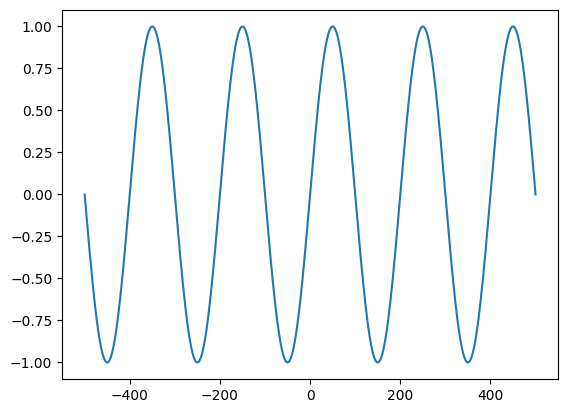

In [2]:
x = np.arange(-500, 501, 1)

wavelength = 200 # frequency
amplitude = 1
phase = 0

y = amplitude * np.sin(2 * np.pi * x / wavelength + phase)

plt.plot(x, y)
plt.show()

You first create an array to represent the x-axis using `np.arange()`. We’re creating an array ranging from **-500** to **500** with steps of 1. The endpoint is not included when using `np.arange()`, which is why 501 is used as the second argument.

We then define y using the simpler of the equations I discussed earlier. The wavelength is 200, which means that **each wave will be 200 units long**. This gives a sine wave when you plot it using `plt.plot()`.

## Moving to 2D sinusoidal gratings

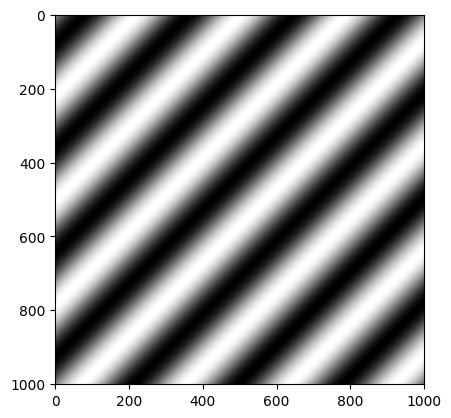

In [3]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

wavelength = 200
amplitude = 1
phase = 0
angle = np.pi / 4

grating = amplitude * np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength + phase
)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

## Display the Fourier Transform of the sinusoidal grating 

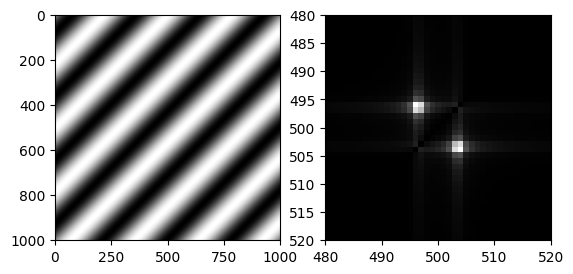

In [4]:
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
amplitude = 1
phase = 0
angle = np.pi / 4

grating = amplitude * np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength + phase
)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier Transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

The sinusoidal grating on the left is the one we've seen earlier. On the right is the visual representation of the Fourier transform of this grating. The result of the FFT is an array of complex numbers. This is why we plot the absolute value of the Fourier Transform FT, using the abs() built-in function.

It shows a value of 0 everywhere except for two points. The two dots are at the same distance from the center. The points are always symmetrical around the center.

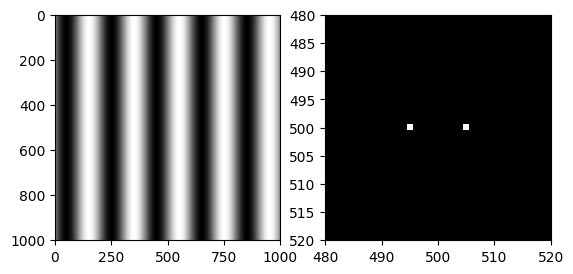

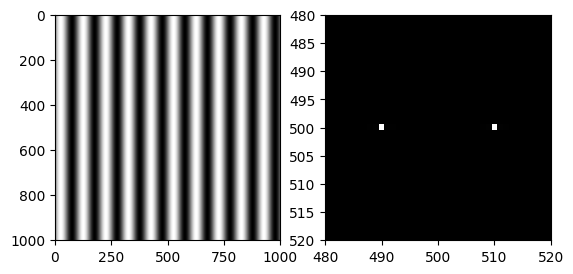

In [5]:
x = np.arange(-500, 501, 1)

wavelength = 200
amplitude = 1
phase = 0
angle = np.pi / 4

def generate_grating(x, wavelength, amplitude=1, phase=0, angle=0):

    X, Y = np.meshgrid(x, x)

    grating = amplitude * np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength + phase
    )

    return grating


plt.set_cmap("gray")

# ------------------------------- first grating ------------------------------ #

# Create the grating
grating_1 = generate_grating(x, wavelength)

# Show the original image
plt.subplot(121)
plt.imshow(grating_1)

# Compute Fourier Transform of grating
ft_1 = np.fft.ifftshift(grating_1)
ft_1 = np.fft.fft2(ft_1)
ft_1 = np.fft.fftshift(ft_1)

# Show the Fourier Transform
plt.subplot(122)
plt.imshow(abs(ft_1))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

# ------------------------------ second grating ------------------------------ #

# Create a grating with a different frequency
grating_2 = generate_grating(x, wavelength / 2) # double the frequency

# Show the original image with a different angle 
plt.subplot(121)
plt.imshow(grating_2)

# Compute Fourier Transform of grating
ft_2 = np.fft.ifftshift(grating_2)
ft_2 = np.fft.fft2(ft_2)
ft_2 = np.fft.fftshift(ft_2)

# Show the Fourier Transform
plt.subplot(122)
plt.imshow(abs(ft_2))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y

plt.show()

When we double the frequency of the sinusoidal grating, the two dots in the Fourier transform move further away from the centre.

The pair of dots in the Fourier transform represents the sinusoidal grating. Dots always come in symmetrical pairs in the Fourier transform. **The distance of the dots from the centre represents the frequency of the sinusoidal grating. The further the dots are from the centre, the higher the frequency they represent**. The orientation of the dots represents the orientation of the grating. **The value of the pixels making up the dots in the Fourier transform represents the amplitude of the grating**. Information about the phase is encoded in the complex Fourier Transform array, however, we’re displaying the absolute value of the Fourier Transform. Therefore the image we display doesn’t show the phase but the information is still there in the Fourier Transform array before we take the absolute value.

**Therefore, the Fourier transform works out the amplitude, frequency, orientation, and phase of a sinusoidal grating.**

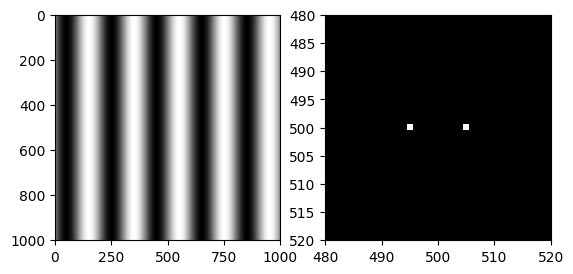

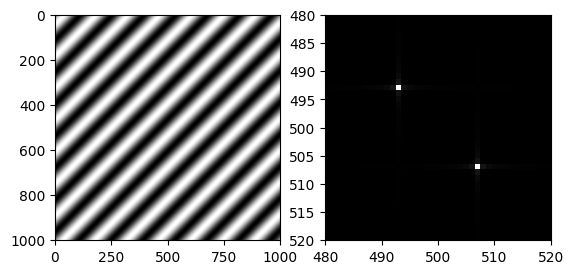

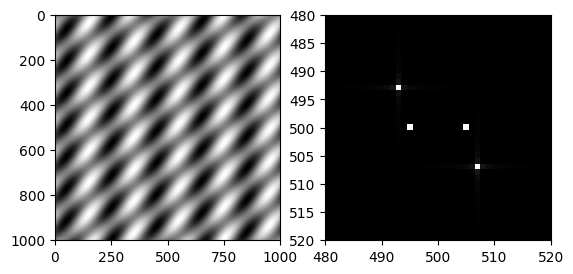

In [6]:
x = np.arange(-500, 501, 1)

wavelength_1 = 200
angle_1 = 0
grating_1 = generate_grating(x, wavelength=wavelength_1, angle=angle_1)

wavelength_2 = 100
angle_2 = np.pi/4
grating_2 = generate_grating(x, wavelength=wavelength_2, angle=angle_2)

gratings = [grating_1, grating_2]

plt.set_cmap("gray")

for grating in gratings:

    plt.subplot(121)
    plt.imshow(grating)

    # Compute Fourier Transform of grating
    ft = np.fft.ifftshift(grating)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)

    # Show the Fourier Transform
    plt.subplot(122)
    plt.imshow(abs(ft))
    plt.xlim([480, 520])
    plt.ylim([520, 480])

    plt.show()


gratings_sum = grating_1 + grating_2

# Add a constant term to represent the background of image
#gratings_sum += 1.25

# Calculate Fourier transform of the sum of the two gratings
ft = np.fft.ifftshift(gratings_sum)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.figure()
plt.subplot(121)
plt.imshow(gratings_sum)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])
plt.show()

Although we cannot easily distinguish the two sinusoidal gratings from the combined image, the Fourier Transform still shows the two components clearly. There are two pairs of dots which represent two sinusoidal gratings. One pair shows a grating oriented along the horizontal axis. The second shows a grating with a 45° orientation and a higher frequency since the dots are further from the centre.

## 2D Fourier Transform of an image

What’s the link between images and these sinusoidal gratings? An image is an array of pixels that each have a certain value. If we limit ourselves to grayscale images, then each pixel in an image is a value that represents the gray level of that pixel. Put these pixels next to each other and they reveal an image.

Let’s look at a real image:

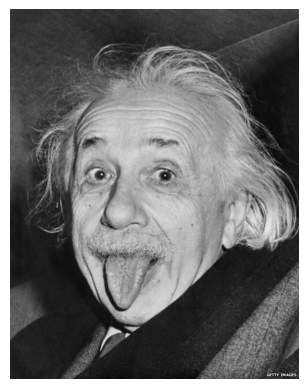

In [7]:
image_filename = "images/einstein.jpg"

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

plt.set_cmap("gray")
plt.imshow(image)
plt.axis("off")
plt.show()

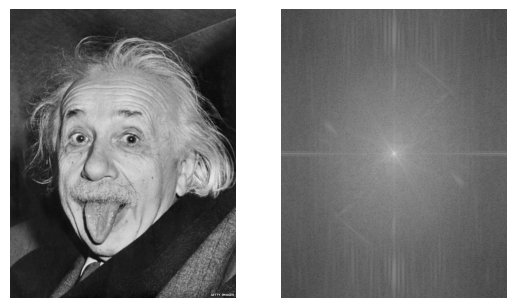

In [8]:
def compute_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

ft = compute_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")

plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")

plt.show()

We display the logarithm of the Fourier Transform using `np.log()` as this allows to see what’s going on better. Without this change, the constant term at the centre of the Fourier Transform would be so much brighter than all the other points that everything else will appear black.

Now there are lots of dots that have non-zero values in the Fourier Transform. We have thousands of pairs of dots. This means that there are thousands of sinusoidal gratings present in the image. Each pair of dots represents a sinusoidal grating with a specific frequency, amplitude, orientation, and phase. The further away the dots are from the centre, the higher the frequency. The brighter they are, the more prominent that grating is in the image as it has a higher amplitude. And the orientation of each pair of dots in relation to the centre represents the orientation of the gratings. The phase is also encoded in the Fourier Transform.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_filename = "images/einstein.jpg"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

# Array dimensions (array is square) and centre pixel
array_size = len(image)
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)

# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap("gray")

ft = calculate_2dft(image)

# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0

# All steps are displayed until display_all_until value
display_all_until = 200
# After this, skip which steps to display using the
# display_step value
display_step = 10
# Work out index of next step to display
next_display = display_all_until + display_step

# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating

        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        # Don't display every step
        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                # Accelerate animation the further the
                # iteration runs by increasing
                # display_step
                display_step += 10
            display_plots(rec_grating, rec_image, idx)

plt.show()